In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
# Загрузка данных
data = pd.read_csv('DZ_2_9.csv')

# Признаки для кластеризации
X = data[['year', 'price']]

# Определение оптимального количества кластеров для GMM
n_clusters = range(2, 10)
gmm_models = [GaussianMixture(n, random_state=42).fit(X) for n in n_clusters]
gmm_bics = [model.bic(X) for model in gmm_models]

optimal_n_clusters = n_clusters[np.argmin(gmm_bics)]
print(f"Оптимальное количество кластеров для GMM: {optimal_n_clusters}")


Оптимальное количество кластеров для GMM: 3


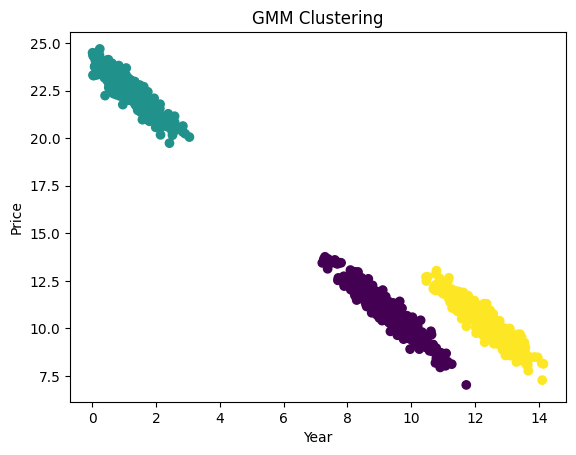

In [3]:
# Обучение GMM с оптимальным количеством кластеров
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Визуализация кластеров
plt.scatter(X['year'], X['price'], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Оптимальное количество кластеров для K-means: 2


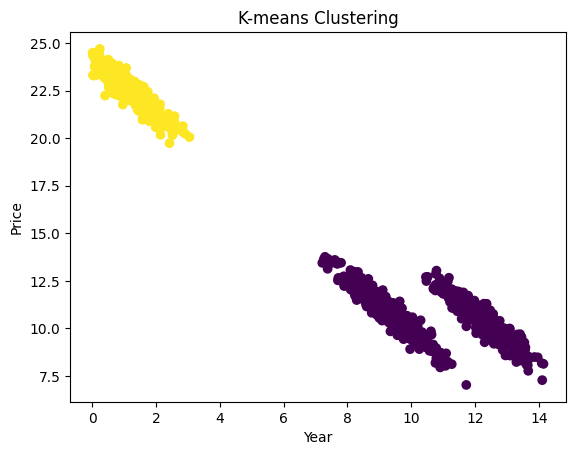

In [4]:
#Шаг 2: Кластеризация K-means
from sklearn.cluster import KMeans
# Определение оптимального количества кластеров для K-means
kmeans_models = [KMeans(n_clusters=n, random_state=42).fit(X) for n in n_clusters]
kmeans_silhouettes = [silhouette_score(X, model.labels_) for model in kmeans_models]

optimal_kmeans_clusters = n_clusters[np.argmax(kmeans_silhouettes)]
print(f"Оптимальное количество кластеров для K-means: {optimal_kmeans_clusters}")

# Обучение K-means с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Визуализация кластеров
plt.scatter(X['year'], X['price'], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Количество точек, размеченных как выбросы (по умолчанию): 2


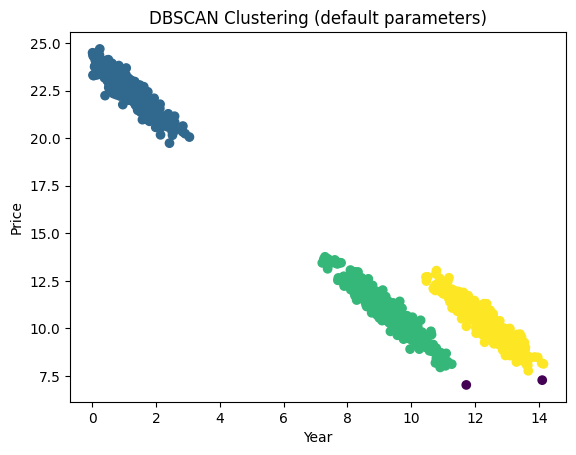

Количество точек, размеченных как выбросы (после подбора параметров): 0


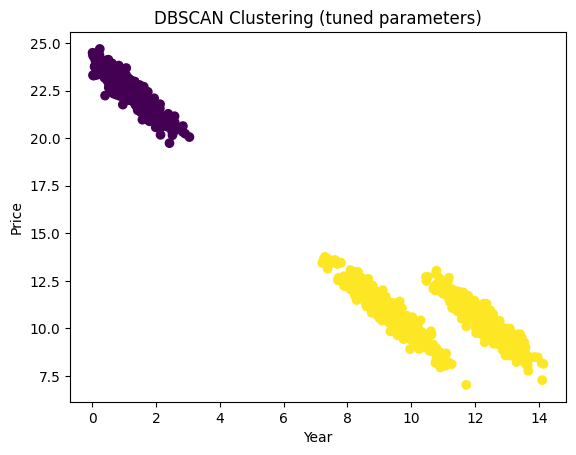

In [5]:
#Шаг 3: Кластеризация DBSCAN
from sklearn.cluster import DBSCAN

# Обучение DBSCAN с параметрами по умолчанию
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X)

# Количество выбросов
n_outliers = np.sum(dbscan_labels == -1)
print(f"Количество точек, размеченных как выбросы (по умолчанию): {n_outliers}")

# Визуализация кластеров
plt.scatter(X['year'], X['price'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering (default parameters)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Подбор параметров eps и min_samples
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Количество выбросов после подбора параметров
n_outliers = np.sum(dbscan_labels == -1)
print(f"Количество точек, размеченных как выбросы (после подбора параметров): {n_outliers}")

# Визуализация кластеров
plt.scatter(X['year'], X['price'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering (tuned parameters)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()